# ABE 516x final project

## Brief introduction 
Our project sponsor requires us to provide a semi-annual updates of our monitoring results. Traditionally, new monitoring data was added into the existing dataset (or modification to existing dataset) and the same analyses were performed manually every six months. This repetitve process consumed a huge amount of time, which then led to the the motivation to automate the process. This goal of this project was to develop a consistent workflow (i.e. reproducibility) to analyze the nutrient and sediment data and the associated parameters (i.e. flow, weather). <br>

The following program will allow any users to analyze the datasets using a consistent method, in addition to saving time from analyzing each dataset manually every time a modification is made to the dataset. <br>

The questions to be answered in this program are: <br>
a) Is analyte concentration higher in one catchment than the other? <br>
b) Is analyte load higher in one catchment than the other? <br> 
c) How does environmental factor (flow, precipitation, and temperature) affect analyte concentration and load? <br>

Additional data can be imported and additional analyses may be added in future development.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## Part 1) Gathering data

In [2]:
# Import nutrient and flow data
data = pd.read_excel('BHL_data.xlsx', sheet_name='Data_by_sub')
data = data.rename(columns={'Sample date': 'Date', 'Flow (cms)':'Flow', 'DRP (mg P/L)':'DRP', 'TP (mg P/L)':'TP', 
                            'TSS (mg/L)':'TSS', 'Nitrate (mg/L)':'NOx', 'TN (mg/L)':'TN'})
data.head()

,Site,Date,Sample type,Flow,DRP,TP,TSS,NOx,TN
0,Sub11,2015-03-20,Base,0.0060,0.020,0.025,1.692308,50.9792,41.6
1,Sub11,2015-03-27,Base,0.0060,0.020,0.014,0.500000,48.7837,40.8
2,Sub11,2015-04-03,Base,0.0240,0.001,0.015,1.231527,45.4211,42.8
3,Sub11,2015-04-11,Base,0.0245,0.012,0.029,7.540395,46.5769,43.0
4,Sub11,2015-04-17,Base,0.0250,0.001,0.016,1.691729,48.2718,43.0


[See weather scrapping code here](Weather_scrapping.ipynb)

In [3]:
# exporting daily weather data csv file

weather_data = pd.read_csv('BHL_weather_data.csv')
weather_data.head()

,Date,precipMM,tempC
0,2015-01-01,0.0,-7.375
1,2015-01-02,0.0,-5.875
2,2015-01-03,0.0,-4.875
3,2015-01-04,1.3,-17.375
4,2015-01-05,0.3,-14.625


## Part 2: Preliminary analysis

In [4]:
# Split nutrient/flow dataset by site
data_11 = data[data['Site'] == 'Sub11']
data_12 = data[data['Site'] == 'Sub12']

### Time series plots

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


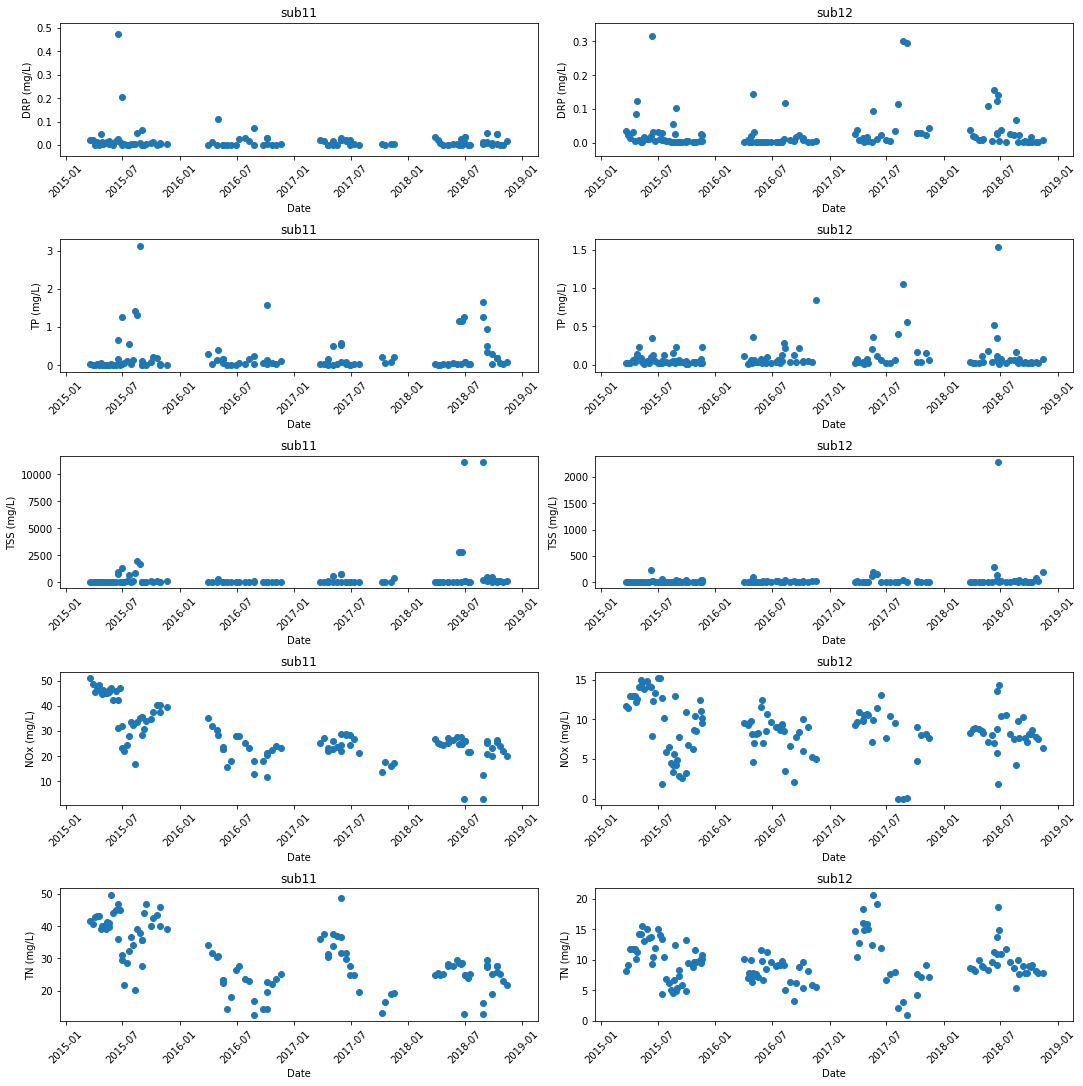

In [5]:
import matplotlib.pyplot as plt

list_of_analytes = ['DRP', 'TP', 'TSS', 'NOx', 'TN']
i = 1

fig = plt.figure(figsize=(15,15))
#fig.subplots_adjust(bottom = 0)

for x in list_of_analytes:
    ax = fig.add_subplot(5,2,i)
    plt.scatter(data_11['Date'],data_11[x])
    plt.title('sub11')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.ylabel(x + ' (mg/L)')
    i = i + 1
    
    ax = fig.add_subplot(5,2,i)
    plt.scatter(data_12['Date'],data_12[x])
    plt.title('sub12')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.ylabel(x + ' (mg/L)')
    i = i + 1

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

### Descriptive analysis (all years)

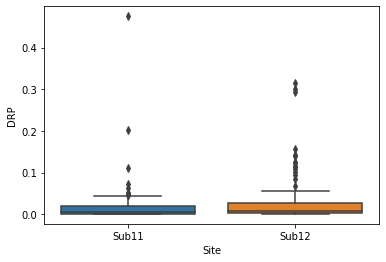

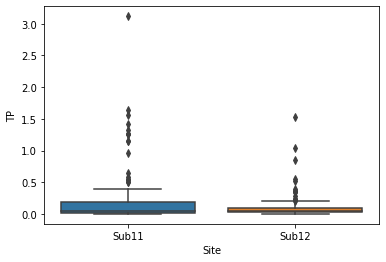

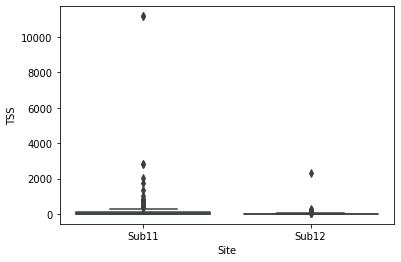

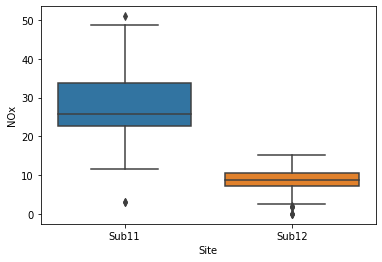

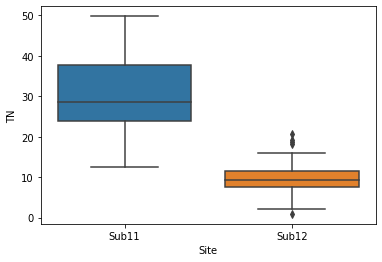

In [6]:
# quick snapshot on the dataset
list_of_analytes = ['DRP', 'TP', 'TSS', 'NOx', 'TN']

for x in list_of_analytes:
    ax = sns.boxplot(x='Site', y=x, data=data)
    plt.show()

In [7]:
data_11.describe()

,Flow,DRP,TP,TSS,NOx,TN
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,0.068453,0.018279,0.238041,396.900882,28.320551,30.174996
std,0.135658,0.050381,0.463947,1544.040251,9.923801,9.230618
min,0.000000,0.001000,0.001500,0.500000,3.051000,12.435000
25%,0.018121,0.001000,0.021500,8.333333,22.606350,23.841000
50%,0.036419,0.005000,0.047000,22.000000,25.850500,28.686000
75%,0.073765,0.019000,0.190000,116.500000,33.813550,37.663000
max,1.296460,0.475000,3.118000,11166.000000,50.979200,49.800000


In [8]:
data_12.describe()

,Flow,DRP,TP,TSS,NOx,TN
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,0.057473,0.028008,0.103682,41.648837,8.755039,9.546512
std,0.072552,0.053944,0.194234,204.343583,3.330117,3.501898
min,0.002000,0.001000,0.002000,0.500000,0.000000,0.900000
25%,0.020000,0.002000,0.025000,4.300000,7.200000,7.600000
50%,0.035000,0.008000,0.040000,8.900000,8.800000,9.200000
75%,0.068000,0.027000,0.098000,21.700000,10.600000,11.600000
max,0.555000,0.316000,1.535000,2284.400000,15.200000,20.700000


### Descriptive analysis (individual years)

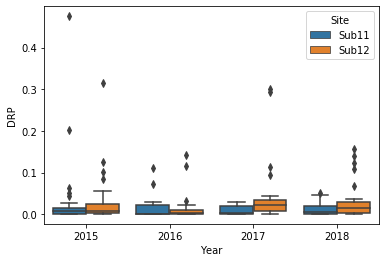

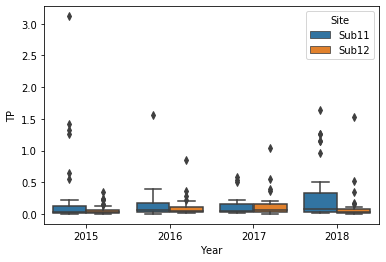

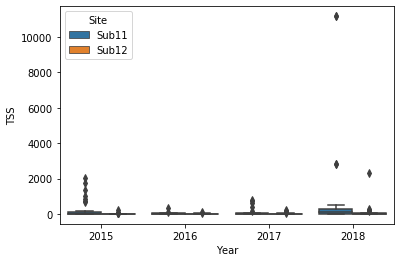

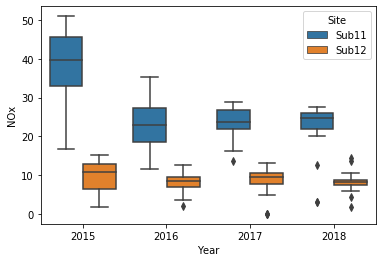

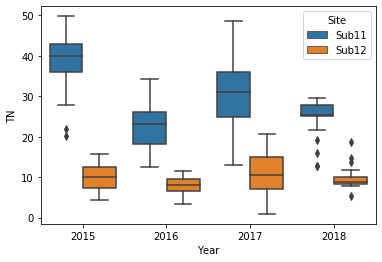

In [9]:
import datetime as dt
# extract year from date

data['Year'] = pd.DatetimeIndex(data['Date']).year
list_of_analytes = ['DRP', 'TP', 'TSS', 'NOx', 'TN']

for x in list_of_analytes:
    ax = sns.boxplot(x='Year', y=x, data=data, hue='Site')
    plt.show()

In [10]:
# I will  not show the mean, median, std of each subdataset because there are too many to show (total of 40)
# If user desires to know the basic stats of all years for a particular site and analyte, 
# the person can use the following prompt box
# each output will show the annual summary of all analytes for the chosen site

user_site = input("Choose sub11 or sub 12:")


if user_site == 'sub11':
    user_data = data[data['Site']=='Sub11']
    for x in list_of_analytes:
        user_data_analyte = user_data[[x,'Year']]
        output = user_data_analyte.groupby('Year').describe()
        output = output.round(3)
        print(output)
elif user_site == 'sub12':
    user_data = data[data['Site']=='Sub12']
    for x in list_of_analytes:
        user_data_analyte = user_data[[x,'Year']]
        output = user_data_analyte.groupby('Year').describe()
        output = output.round(3)
        print(output)
    

Choose sub11 or sub 12:sub11
       DRP                                                 
     count   mean    std    min    25%    50%    75%    max
Year                                                       
2015  39.0  0.028  0.081  0.001  0.002  0.007  0.014  0.475
2016  22.0  0.016  0.027  0.001  0.001  0.001  0.024  0.110
2017  21.0  0.010  0.010  0.001  0.001  0.004  0.021  0.029
2018  29.0  0.013  0.016  0.001  0.001  0.006  0.020  0.052
        TP                                                 
     count   mean    std    min    25%    50%    75%    max
Year                                                       
2015  39.0  0.254  0.596  0.002  0.016  0.029  0.124  3.118
2016  22.0  0.176  0.327  0.002  0.035  0.068  0.176  1.568
2017  21.0  0.135  0.180  0.010  0.027  0.046  0.152  0.587
2018  29.0  0.338  0.489  0.013  0.032  0.077  0.338  1.645
       TSS                                                              
     count      mean       std    min     25%      50%    

## Part 3: Data analysis
### Data analysis outputs should include:
__a) Load calculation__ <br>
This will answer the question "was analyte load higher in one catchment than the other". <br>

__b) T-test or Wilcoxon test__ <br>
This will help to answer "was analyte concentration higher in one catchment than the other". <br>

__c) Dimension reduction__ <br>
This will help to eliminate the auxiliary parameters that had little impact on responding variables (i.e. analyte concentration). If a parameter had little impact, it will not be analyzed for its correlation with the responding variables. <br>
Note that this step was not really necessary because we only had three auxiliary parameters, but it will help when we want to bring in more parameters for testing in the future.



### Part 3A: Load calculation

In [11]:
data.head()

,Site,Date,Sample type,Flow,DRP,TP,TSS,NOx,TN,Year
0,Sub11,2015-03-20,Base,0.0060,0.020,0.025,1.692308,50.9792,41.6,2015
1,Sub11,2015-03-27,Base,0.0060,0.020,0.014,0.500000,48.7837,40.8,2015
2,Sub11,2015-04-03,Base,0.0240,0.001,0.015,1.231527,45.4211,42.8,2015
3,Sub11,2015-04-11,Base,0.0245,0.012,0.029,7.540395,46.5769,43.0,2015
4,Sub11,2015-04-17,Base,0.0250,0.001,0.016,1.691729,48.2718,43.0,2015


In [12]:
# calculate the annual load of all years, except 2015
# only keep rows for year 2016, 2017, and 2018
data_load = data[data['Year'] > 2015]
data_load.head()

,Site,Date,Sample type,Flow,DRP,TP,TSS,NOx,TN,Year
31,Sub11,2016-03-31,Base,0.025511,0.001,0.293,18.666667,35.3001,34.2560,2016
32,Sub11,2016-04-14,Base,0.041794,0.013,0.040,2.000000,31.7656,31.7656,2016
33,Sub11,2016-04-28,Base,0.078278,0.001,0.129,39.333333,30.5188,30.3610,2016
34,Sub11,2016-05-17,Base,0.064980,0.001,0.177,63.333333,22.9285,23.2680,2016
35,Sub11,2016-05-17,Base,0.064980,0.001,0.177,63.333333,22.9285,23.2680,2016


In [13]:
# calculate the analyte load by multiplying flow and concentration, then remove concentration column
list_of_analytes = ['DRP', 'TP', 'TSS', 'NOx', 'TN']

for x in list_of_analytes:
    data_load[x + '_load'] = data_load['Flow'] * data_load[x]

data_load = data_load.drop(columns=['DRP', 'TP', 'TSS', 'NOx', 'TN'])
data_load.head()

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Site,Date,Sample type,Flow,Year,DRP_load,TP_load,TSS_load,NOx_load,TN_load
31,Sub11,2016-03-31,Base,0.025511,2016,0.000026,0.007475,0.476207,0.900545,0.873909
32,Sub11,2016-04-14,Base,0.041794,2016,0.000543,0.001672,0.083589,1.327621,1.327621
33,Sub11,2016-04-28,Base,0.078278,2016,0.000078,0.010098,3.078926,2.388944,2.376592
34,Sub11,2016-05-17,Base,0.064980,2016,0.000065,0.011501,4.115410,1.489898,1.511958
35,Sub11,2016-05-17,Base,0.064980,2016,0.000065,0.011501,4.115410,1.489898,1.511958


In [14]:
# calculate the annual load of all analytes
data_load_summary = data_load.groupby(['Site', 'Sample type','Year'])['DRP_load','TP_load', 'TSS_load', 'NOx_load', 'TN_load'].sum()
data_load_summary = data_load_summary.round(3)
data_load_summary

DRP_load  TP_load  TSS_load  NOx_load  TN_load
Site  Sample type Year                                                
Sub11 Base        2016     0.001    0.049    13.788    11.713   11.634
                  2017     0.009    0.085    95.061    18.481   23.370
                  2018     0.008    0.108    62.558    15.134   15.662
      Event       2016     0.034    0.194    92.495    12.395   12.829
                  2017     0.008    0.203   243.393    14.354   22.553
                  2018     0.025    0.801  4335.160    21.798   27.300
Sub12 Base        2016     0.002    0.034     4.566     3.286    3.181
                  2017     0.016    0.051    21.460     5.721    7.088
                  2018     0.011    0.028    17.031     5.392    5.732
      Event       2016     0.036    0.129    28.761     8.130    8.524
                  2017     0.031    0.122    50.842     7.126   11.976
                  2018     0.195    1.202  1428.458    10.724   23.114

In [15]:
print(type(data_load_summary))
print(data_load_summary.dtypes)

<class 'pandas.core.frame.DataFrame'>
DRP_load    float64
TP_load     float64
TSS_load    float64
NOx_load    float64
TN_load     float64
dtype: object


In [16]:
# convert pandas index into column value for plotting
data_load_summary.reset_index(inplace=True)
print(data_load_summary.dtypes)

Site            object
Sample type     object
Year             int64
DRP_load       float64
TP_load        float64
TSS_load       float64
NOx_load       float64
TN_load        float64
dtype: object


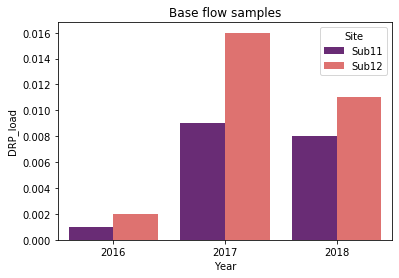

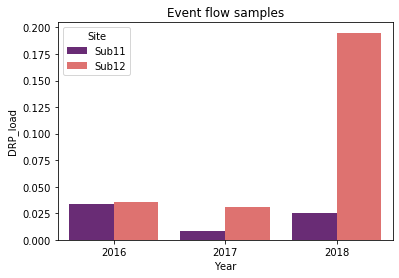

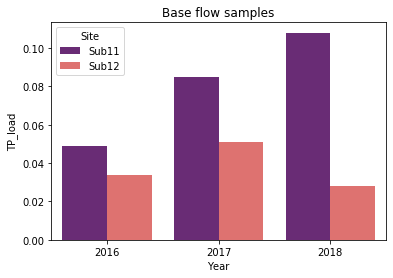

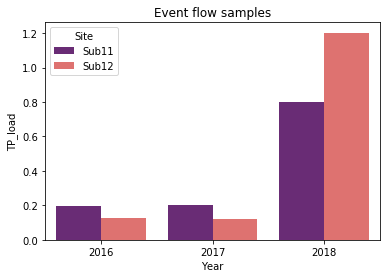

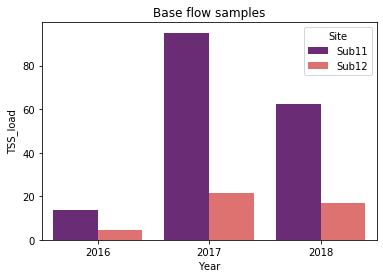

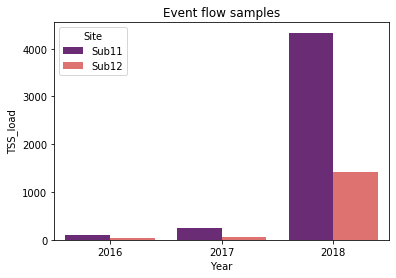

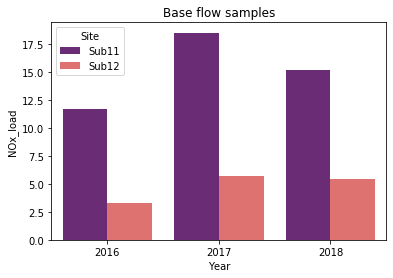

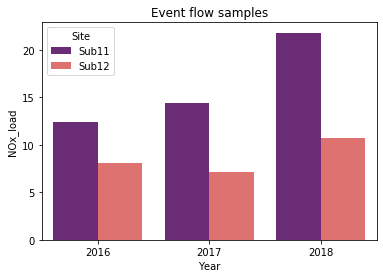

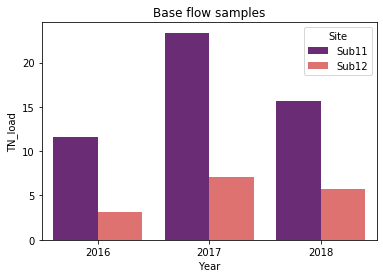

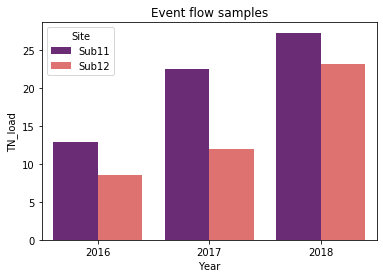

In [17]:
load_base = data_load_summary[data_load_summary['Sample type']=='Base']
load_event = data_load_summary[data_load_summary['Sample type']=='Event']

list_of_analytes = ['DRP_load', 'TP_load', 'TSS_load', 'NOx_load', 'TN_load']
for y in list_of_analytes:
    base_plot = sns.barplot(x="Year", y=y, hue='Site', data=load_base , palette = 'magma')
    plt.title('Base flow samples')
    plt.show()
    event_plot = sns.barplot(x="Year", y=y,  hue='Site', data=load_event, palette = 'magma')
    plt.title('Event flow samples')
    plt.show()

# can add the save fig function later - to export fig into the website

### Part 3B: Significant differences of mean (or median) between datasets
- normality test
- test for significant difference of analyte concentrations between base vs event samples at respective sites
- test for significant difference of analyte concentrations of base OR event samples between sites

In [18]:
# the main dataset was already separated into data_11 and data_12 above
data_12.head()

,Site,Date,Sample type,Flow,DRP,TP,TSS,NOx,TN
111,Sub12,2015-03-20,Base,0.020,0.036,0.025,0.5,11.7,8.2
112,Sub12,2015-03-27,Base,0.015,0.024,0.016,0.5,11.5,9.2
113,Sub12,2015-04-03,Base,0.014,0.013,0.015,0.5,12.9,11.7
114,Sub12,2015-04-11,Base,0.032,0.031,0.055,0.5,13.0,11.7
115,Sub12,2015-04-17,Base,0.043,0.005,0.034,1.7,12.9,11.7


In [19]:
# test for normality, then for significant difference of analyte concentrations between base vs event samples at respective sites
# if not normal, use Wilcoxon rank sum; if normal, use t-test

from scipy import stats
from scipy.stats import ranksums
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


alpha = 0.05   #alpha value for shapiro and t-test/Wilcoxon
list_of_dataset = [data_11, data_12]
data_11.name = 'Sub11'
data_12.name = 'Sub12'
list_of_analytes = ['DRP', 'TP', 'TSS', 'NOx', 'TN']

for m in list_of_dataset:
    print(color.BOLD + m.name + ': comparison of base vs event flow concentrations' + color.END)
    dataset_base = m[m['Sample type']=='Base']
    dataset_event = m[m['Sample type']=='Event']
    
    for n in list_of_analytes:
        analyte_base = dataset_base[n]
        analyte_event = dataset_event[n]
        norm_base = stats.shapiro(analyte_base)
        norm_event = stats.shapiro(analyte_event)
        
        if norm_base[1] <= alpha or norm_event[1] <=alpha: #i.e. data is not normal
            print('WILCOXON RANK SUM TEST')
            w, p = ranksums(analyte_base, analyte_event)
            if p <= 0.05:
                p = round(p, 3)
                print(n + ': significanty different @ p =' + str(p))
            elif p > 0.05:
                p = round(p, 3)
                print(n + ': NOT significanty different @ p =' + str(p))
        elif norm_base[1] > alpha or norm_event[1] > alpha:
            print('T-TEST')
            t, p = stats.ttest_ind(analyte_base, analyte_event)
            if p <= 0.05:
                p = round(p, 3)
                print(n + ': significanty different @ p =' + str(p))
            elif p > 0.05:
                p = round(p, 3)
                print(n + ': NOT significanty different @ p =' + str(p))        


Sub11: comparison of base vs event flow concentrations
WILCOXON RANK SUM TEST
DRP: significanty different @ p =0.005
WILCOXON RANK SUM TEST
TP: significanty different @ p =0.0
WILCOXON RANK SUM TEST
TSS: significanty different @ p =0.0
WILCOXON RANK SUM TEST
NOx: NOT significanty different @ p =0.1
WILCOXON RANK SUM TEST
TN: NOT significanty different @ p =0.541
Sub12: comparison of base vs event flow concentrations
WILCOXON RANK SUM TEST
DRP: NOT significanty different @ p =0.072
WILCOXON RANK SUM TEST
TP: significanty different @ p =0.003
WILCOXON RANK SUM TEST
TSS: significanty different @ p =0.0
WILCOXON RANK SUM TEST
NOx: NOT significanty different @ p =0.34
WILCOXON RANK SUM TEST
TN: NOT significanty different @ p =0.721


In [20]:
# separate the main dataset into "base" and "event" dataset

data_base = data[data['Sample type']=='Base']
data_event = data[data['Sample type']=='Event']
data_event.head()

,Site,Date,Sample type,Flow,DRP,TP,TSS,NOx,TN,Year
82,Sub11,2015-05-19,Event,0.028210,0.018,0.0015,22.333667,45.3700,41.0,2015
83,Sub11,2015-06-16,Event,0.189993,0.027,0.1770,1006.666667,31.3574,47.0,2015
84,Sub11,2015-06-30,Event,1.296460,0.203,1.2590,1338.666667,32.0861,31.2,2015
85,Sub11,2015-08-18,Event,0.131722,0.050,1.3280,2026.000000,33.4932,39.0,2015
86,Sub11,2015-08-25,Event,0.120204,0.010,3.1180,1722.000000,35.0250,37.8,2015


In [21]:
# test for normality, then for significant difference of analyte concentrations of base vs event samples between sites
# if not normal, use Wilcoxon rank sum; if normal, use t-test

from scipy import stats
from scipy.stats import ranksums
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


alpha = 0.05   #alpha value for shapiro and t-test/Wilcoxon
list_of_dataset = [data_base, data_event]
data_base.name = 'Base'
data_event.name = 'Event'
list_of_analytes = ['DRP', 'TP', 'TSS', 'NOx', 'TN']

for m in list_of_dataset:
    print(color.BOLD + m.name + ': comparison of analyte concentrations between sites' + color.END)
    dataset_11 = m[m['Site']=='Sub11']
    dataset_12 = m[m['Site']=='Sub12']
    
    for n in list_of_analytes:
        analyte_11 = dataset_11[n]
        analyte_12 = dataset_12[n]
        norm_11 = stats.shapiro(analyte_11)
        norm_12 = stats.shapiro(analyte_12)
        
        if norm_11[1] <= alpha or norm_12[1] <=alpha: #i.e. data is not normal
            print('WILCOXON RANK SUM TEST')
            w, p = ranksums(analyte_11, analyte_12)
            if p <= alpha:
                p = round(p, 3)
                print(n + ': significanty different @ p =' + str(p))
            elif p > alpha:
                p = round(p, 3)
                print(n + ': NOT significanty different @ p =' + str(p))
        elif norm_11[1] > alpha or norm_12[1] > alpha:
            print('T-TEST')
            t, p = stats.ttest_ind(analyte_11, analyte_12)
            if p <= alpha:
                p = round(p, 3)
                print(n + ': significanty different @ p =' + str(p))
            elif p > alpha:
                p = round(p, 3)
                print(n + ': NOT significanty different @ p =' + str(p))     

Base: comparison of analyte concentrations between sites
WILCOXON RANK SUM TEST
DRP: significanty different @ p =0.015
WILCOXON RANK SUM TEST
TP: NOT significanty different @ p =0.78
WILCOXON RANK SUM TEST
TSS: significanty different @ p =0.0
WILCOXON RANK SUM TEST
NOx: significanty different @ p =0.0
WILCOXON RANK SUM TEST
TN: significanty different @ p =0.0
Event: comparison of analyte concentrations between sites
WILCOXON RANK SUM TEST
DRP: NOT significanty different @ p =0.797
WILCOXON RANK SUM TEST
TP: significanty different @ p =0.002
WILCOXON RANK SUM TEST
TSS: significanty different @ p =0.0
T-TEST
NOx: significanty different @ p =0.0
WILCOXON RANK SUM TEST
TN: significanty different @ p =0.0


In [22]:
# the outputs above will only tell you the datasets were significant different or not
# if significant, the table below will tell you if one dataset is higher or lower than the other
# refer to mean if the t-test was used (as the test compares mean)
data_mean = data.groupby(['Site', 'Sample type'])['DRP','TP', 'TSS', 'NOx', 'TN'].mean()
data_mean = data_mean.round(3)
data_mean

DRP     TP       TSS     NOx      TN
Site  Sample type                                        
Sub11 Base         0.014  0.124    80.035  29.645  30.689
      Event        0.030  0.561  1292.868  24.575  28.723
Sub12 Base         0.022  0.082    18.591   9.000   9.409
      Event        0.040  0.148    89.412   8.248   9.831

In [23]:
# refer to median if the t-test was used (as the test compares median)
data_median = data.groupby(['Site', 'Sample type'])['DRP','TP', 'TSS', 'NOx', 'TN'].median()
data_median = data_median.round(3)
data_median

DRP     TP      TSS     NOx      TN
Site  Sample type                                       
Sub11 Base         0.003  0.035   15.767  26.907  29.000
      Event        0.014  0.241  148.000  25.088  28.686
Sub12 Base         0.007  0.034    7.200   8.800   9.100
      Event        0.016  0.063   18.550   8.600   9.350

### Part 3C: Correlations between auxiliary parameter and analyte concentrations
- PCA analysis to determine if these auxiliary parameters can explain most of the variables <br>
The higher the values in the first few PC components, the more likely the auxiliary parameters are correlated with the variable
- normality test
- test for correlation between analyte concentration and flow
- test for correlation between analyte concentration and precipitation
- test for correlation between analyte concentration and temperature

In [131]:
weather_data = pd.read_csv('BHL_weather_data.csv')
weather_data.head()

,Date,precipMM,tempC
0,2015-01-01,0.0,-7.375
1,2015-01-02,0.0,-5.875
2,2015-01-03,0.0,-4.875
3,2015-01-04,1.3,-17.375
4,2015-01-05,0.3,-14.625


In [132]:
weather_data['2dayppt'] = weather_data['precipMM'] + weather_data['precipMM'].shift(+1)
weather_data['3dayppt'] = weather_data['precipMM'] + weather_data['precipMM'].shift(+1) + weather_data['precipMM'].shift(+2)
weather_data.head()

,Date,precipMM,tempC,2dayppt,3dayppt
0,2015-01-01,0.0,-7.375,NaN,NaN
1,2015-01-02,0.0,-5.875,0.0,NaN
2,2015-01-03,0.0,-4.875,0.0,0.0
3,2015-01-04,1.3,-17.375,1.3,1.3
4,2015-01-05,0.3,-14.625,1.6,1.6


In [133]:
# convert Date from object to datetime so that it can merge with the other dataset
from datetime import datetime
print(weather_data.dtypes)
weather_data['Date'] =  pd.to_datetime(weather_data['Date'], format='%Y-%m-%d')
print(weather_data.dtypes)

Date         object
precipMM    float64
tempC       float64
2dayppt     float64
3dayppt     float64
dtype: object
Date        datetime64[ns]
precipMM           float64
tempC              float64
2dayppt            float64
3dayppt            float64
dtype: object


In [140]:
data_corr_11 = data_11
data_corr_12 = data_12
data_corr_12.head()

,Site,Date,Sample type,Flow,DRP,TP,TSS,NOx,TN
111,Sub12,2015-03-20,Base,0.020,0.036,0.025,0.5,11.7,8.2
112,Sub12,2015-03-27,Base,0.015,0.024,0.016,0.5,11.5,9.2
113,Sub12,2015-04-03,Base,0.014,0.013,0.015,0.5,12.9,11.7
114,Sub12,2015-04-11,Base,0.032,0.031,0.055,0.5,13.0,11.7
115,Sub12,2015-04-17,Base,0.043,0.005,0.034,1.7,12.9,11.7


In [141]:
# merge weather and nutrient dataset
data_corr_11 = pd.merge(data_corr_11, weather_data, on='Date')
data_corr_12 = pd.merge(data_corr_12, weather_data, on='Date')
data_corr_12.head()

,Site,Date,Sample type,Flow,DRP,TP,TSS,NOx,TN,precipMM,tempC,2dayppt,3dayppt
0,Sub12,2015-03-20,Base,0.020,0.036,0.025,0.5,11.7,8.2,0.0,8.875,0.1,0.5
1,Sub12,2015-03-27,Base,0.015,0.024,0.016,0.5,11.5,9.2,0.0,-0.125,0.0,0.0
2,Sub12,2015-04-03,Base,0.014,0.013,0.015,0.5,12.9,11.7,0.0,5.000,1.7,1.7
3,Sub12,2015-04-11,Base,0.032,0.031,0.055,0.5,13.0,11.7,0.0,12.750,0.0,3.5
4,Sub12,2015-04-17,Base,0.043,0.005,0.034,1.7,12.9,11.7,0.0,19.000,0.0,0.2


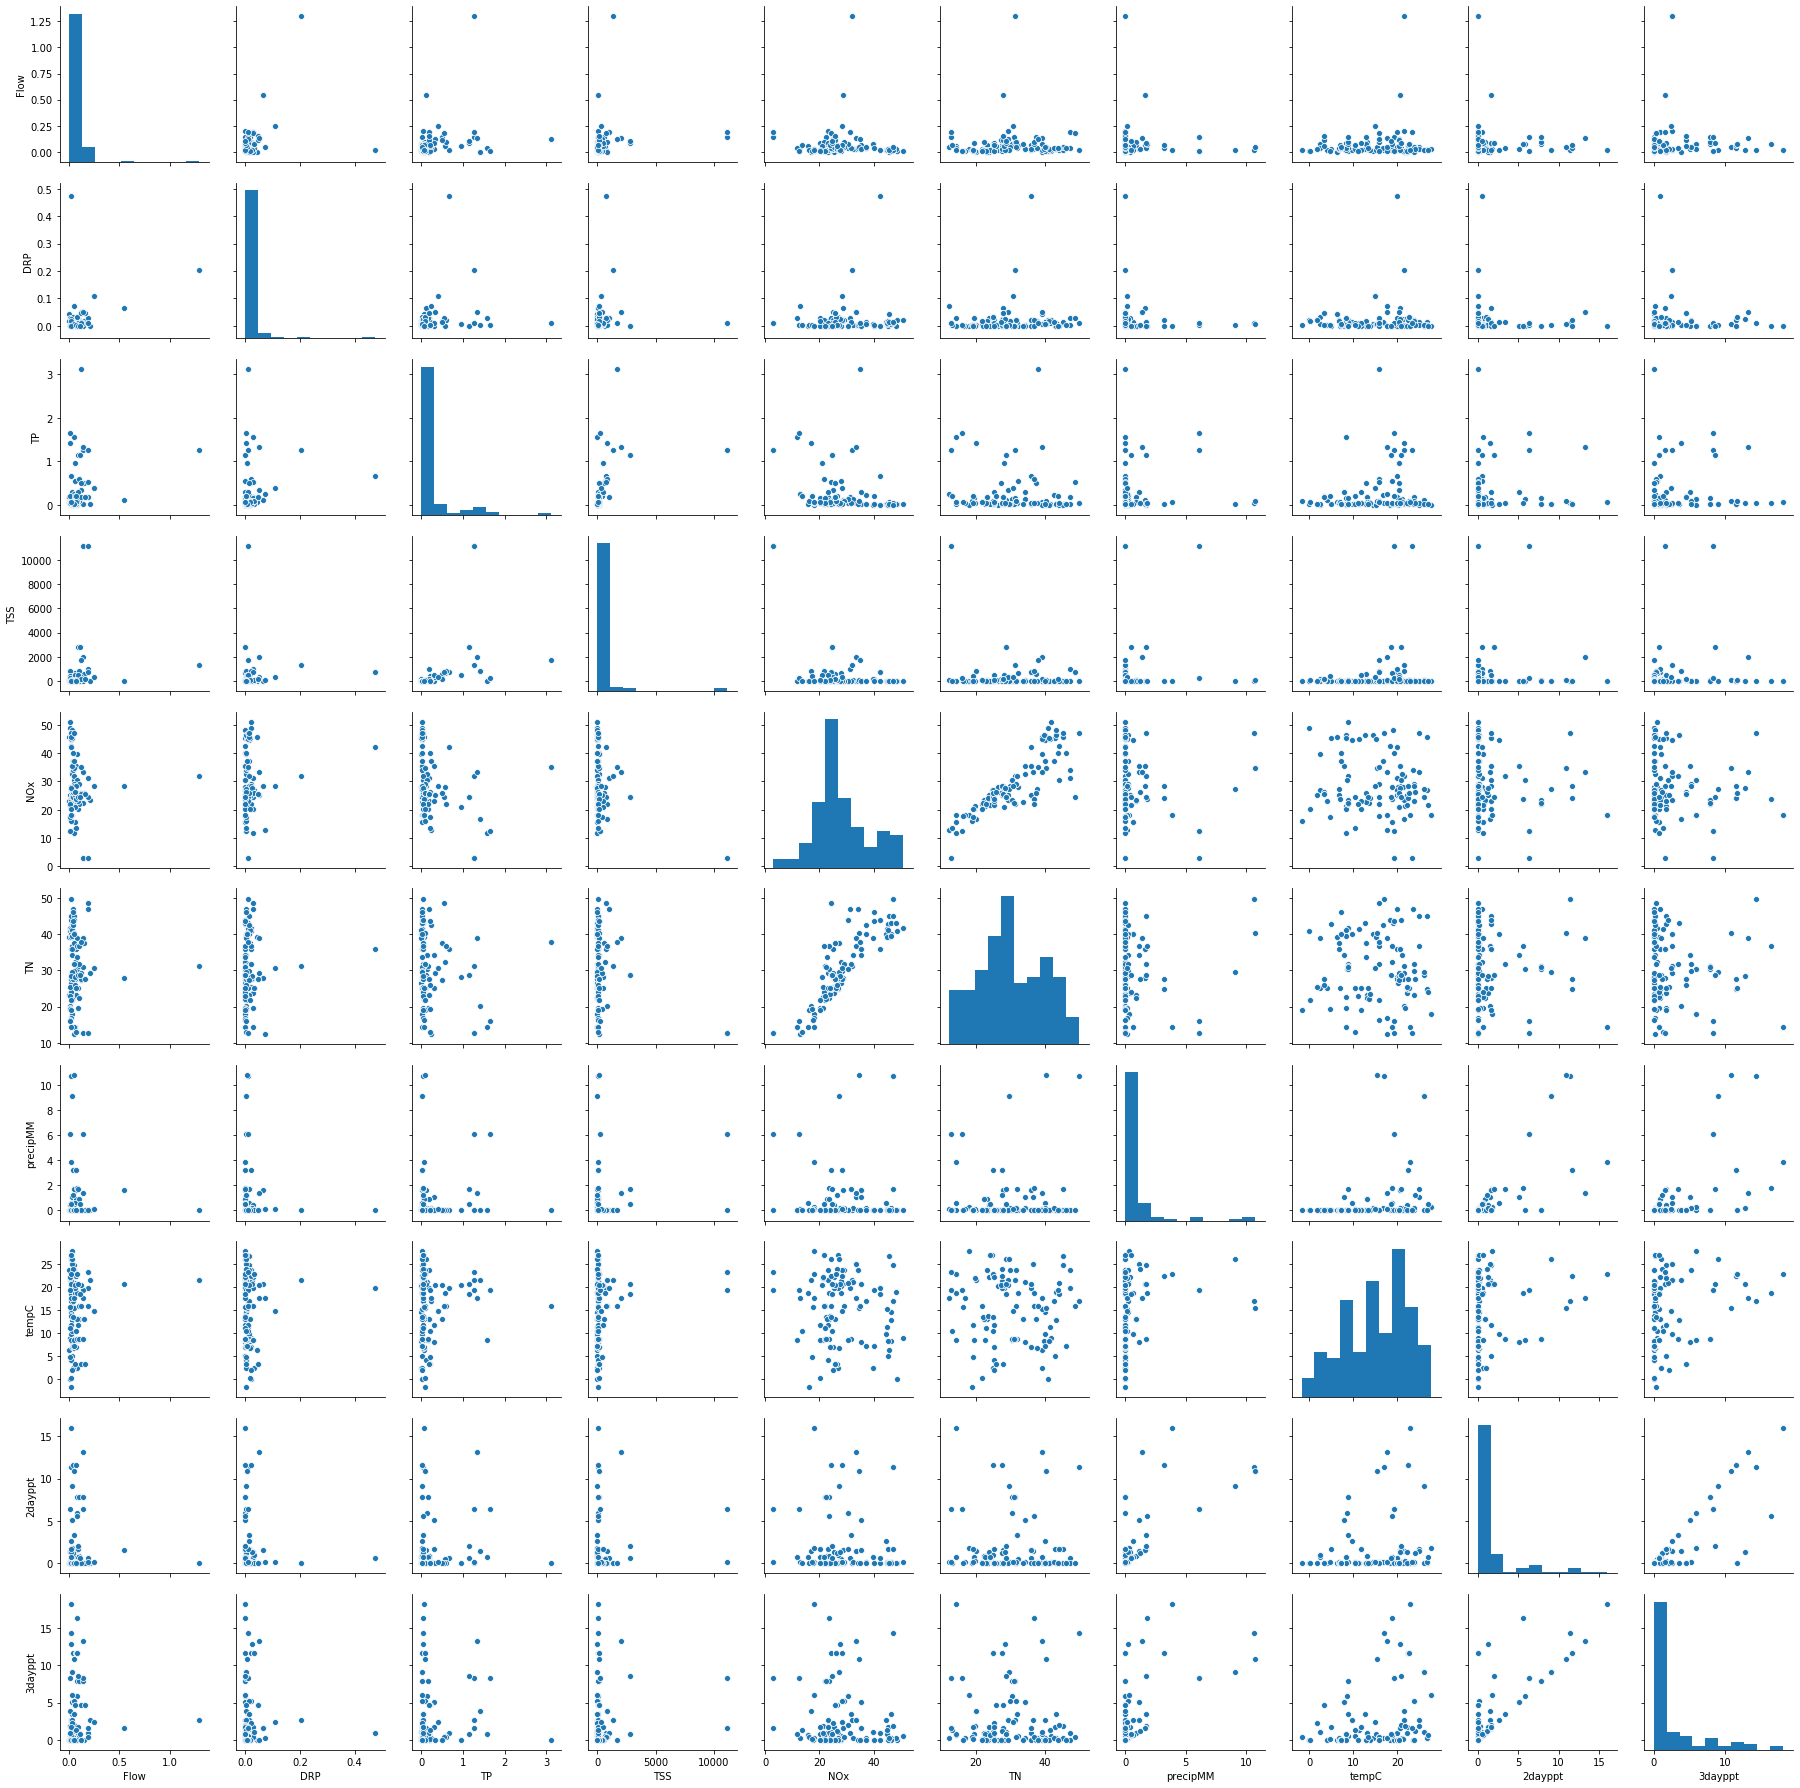

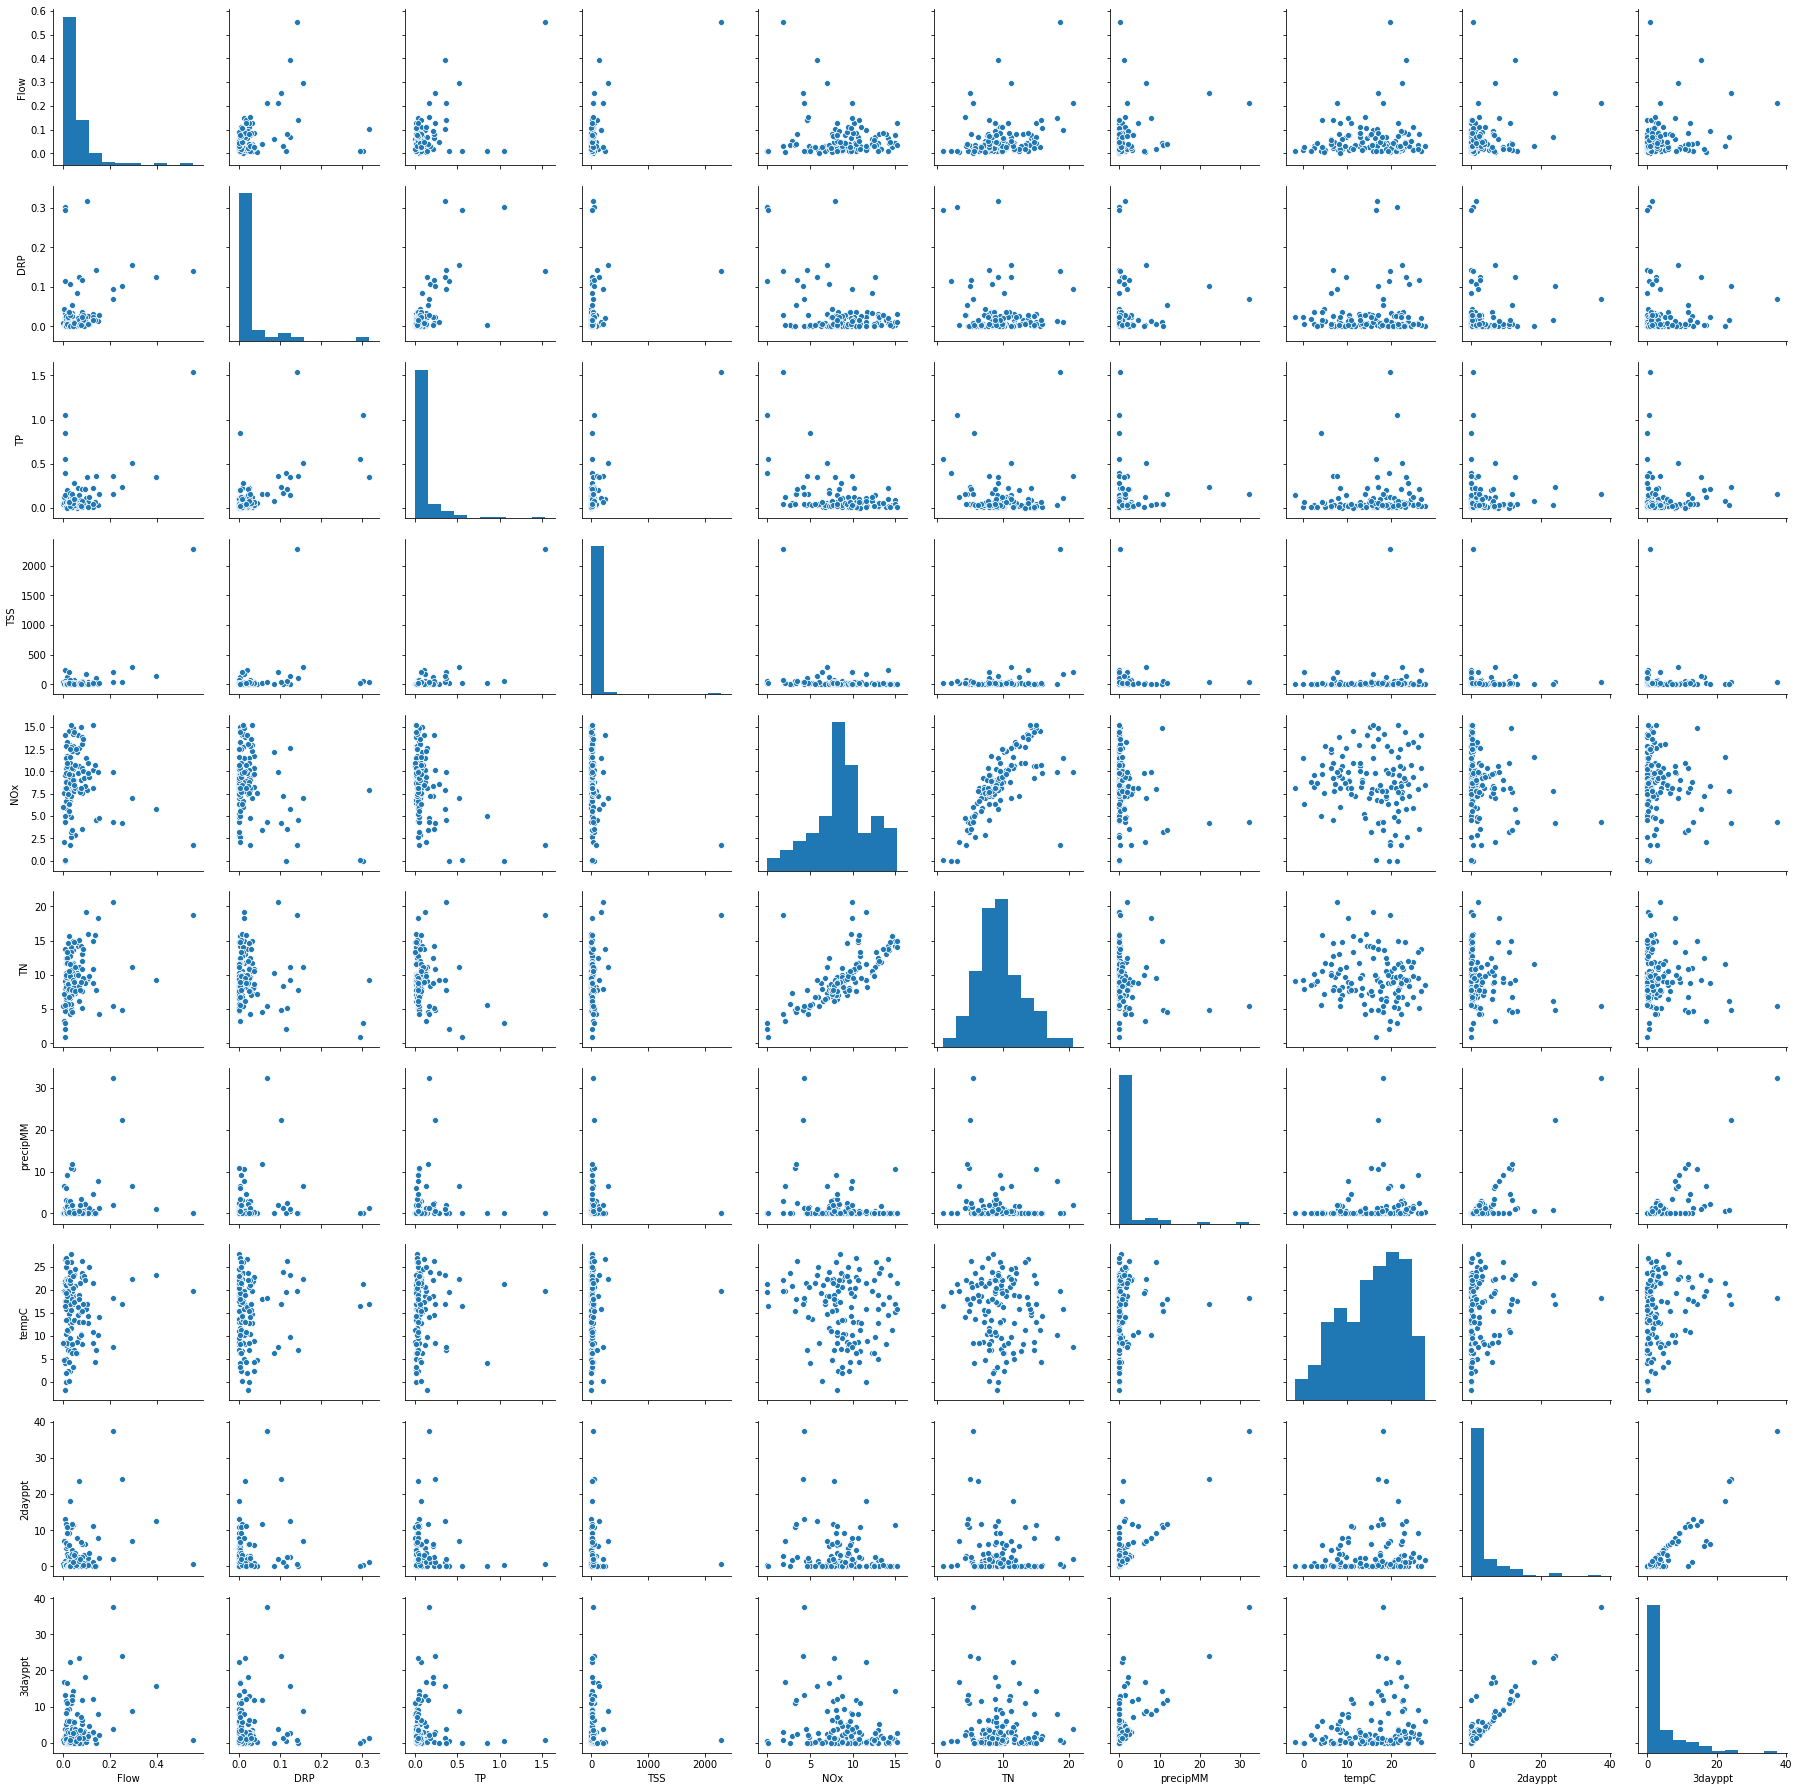

In [135]:
# create pairplots

list_of_dataset = [data_corr_11, data_corr_12]
data_corr_11.name = 'Sub11'
data_corr_12.name = 'Sub12'

for m in list_of_dataset:    
    feature_list = list(m.columns[0:14])
    feature = m[feature_list]
    corr_pp_fig = sns.pairplot(feature)
    corr_pp_fig.savefig(('corr_pp' + m.name), dpi=fig.dpi)


Sub11 DRP
Before scaling


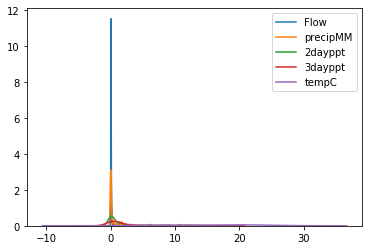

After scaling


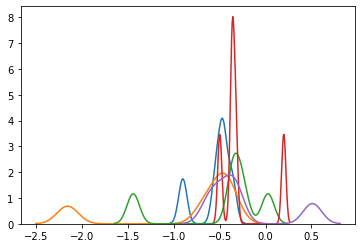

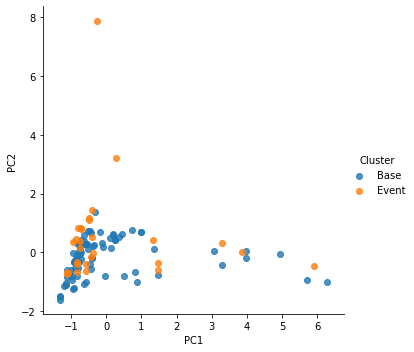

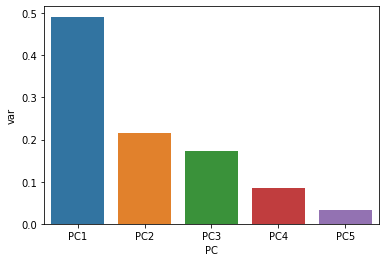

Sub11 TP
Before scaling


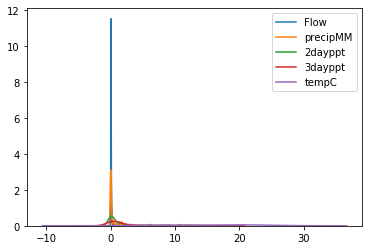

After scaling


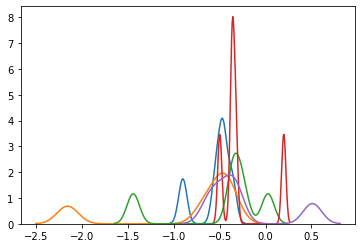

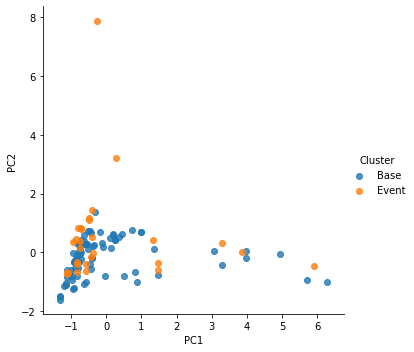

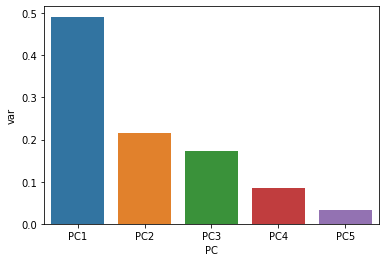

Sub11 TSS
Before scaling


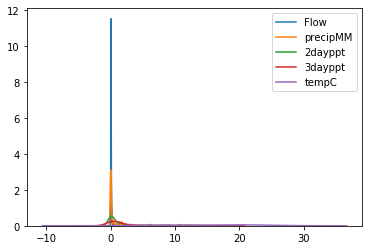

After scaling


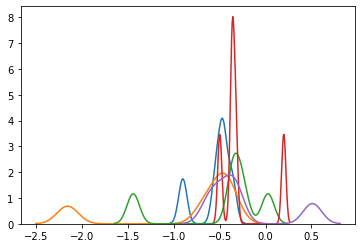

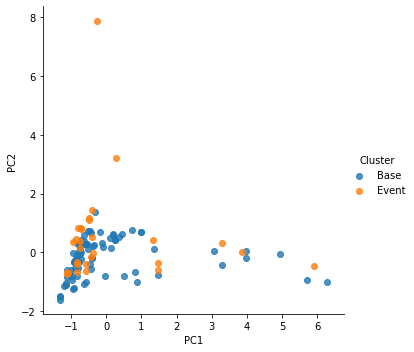

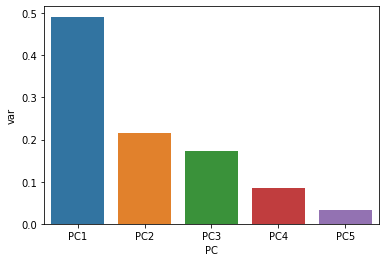

Sub11 NOx
Before scaling


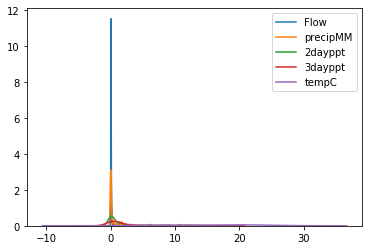

After scaling


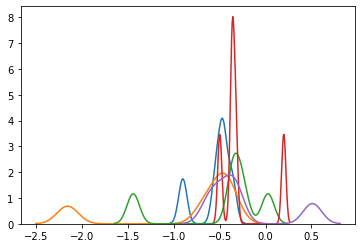

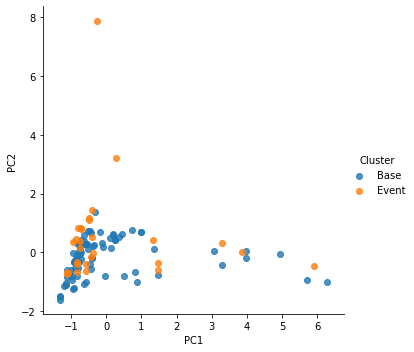

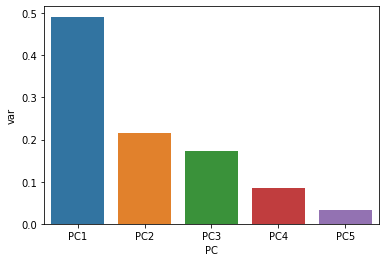

Sub11 TN
Before scaling


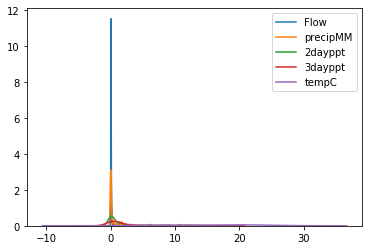

After scaling


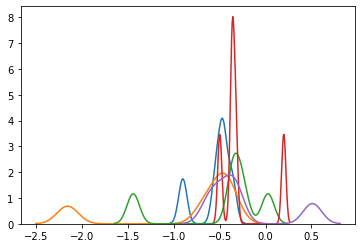

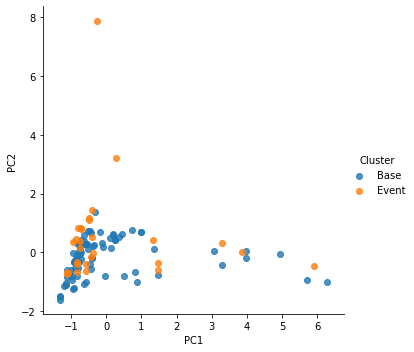

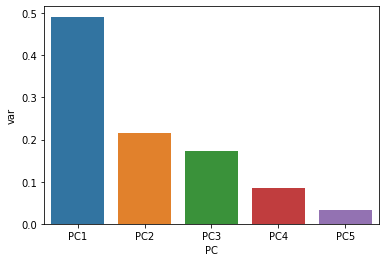

Sub12 DRP
Before scaling


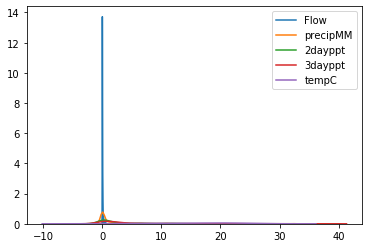

After scaling


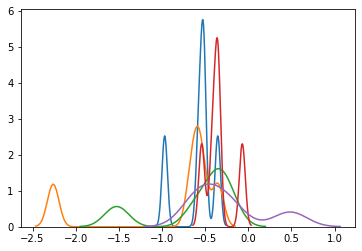

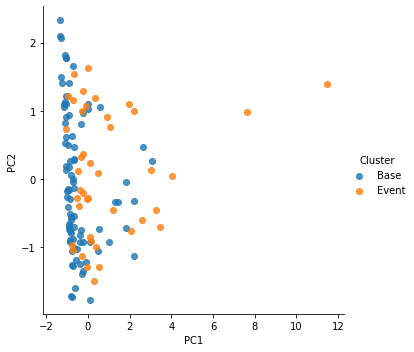

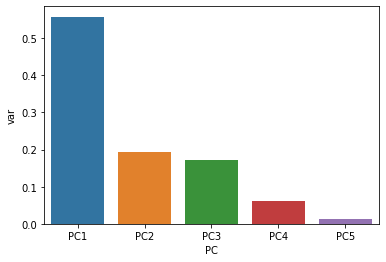

Sub12 TP
Before scaling


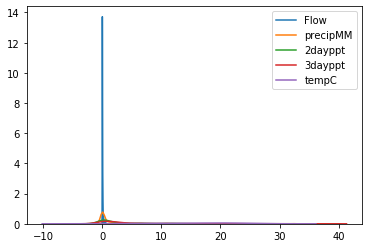

After scaling


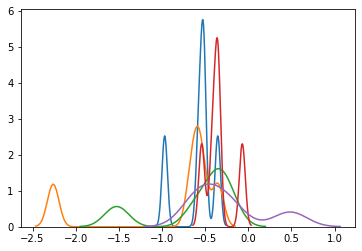

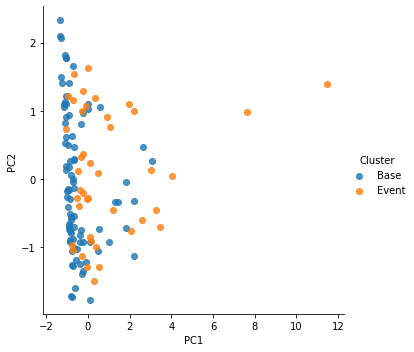

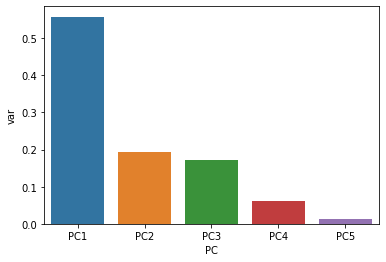

Sub12 TSS
Before scaling


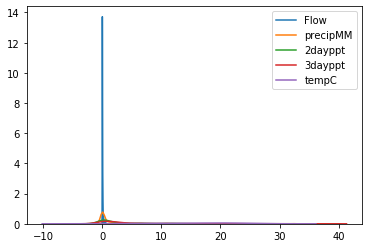

After scaling


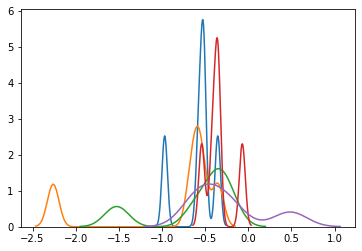

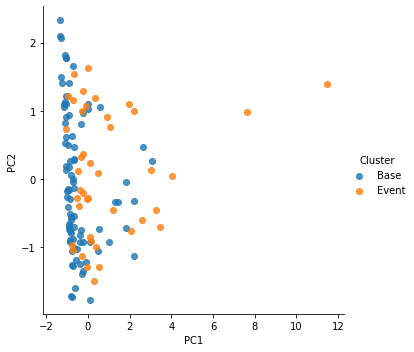

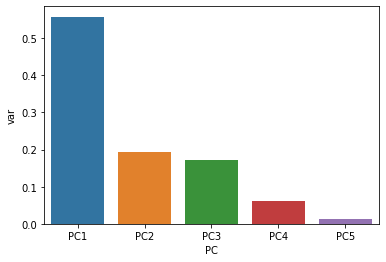

Sub12 NOx
Before scaling


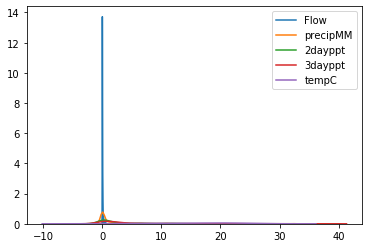

After scaling


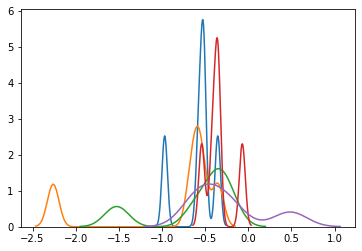

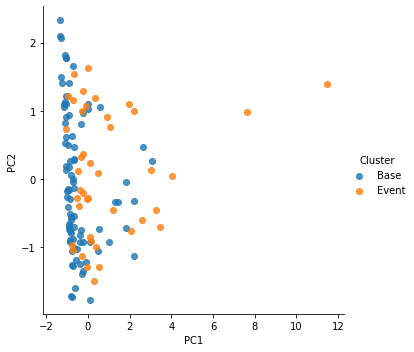

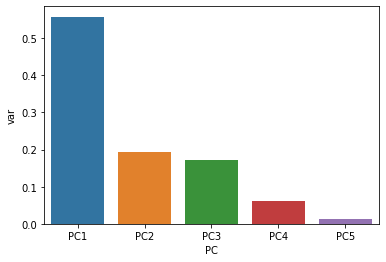

Sub12 TN
Before scaling


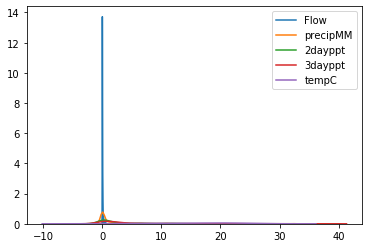

After scaling


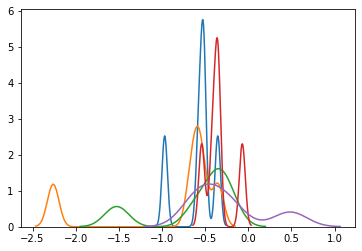

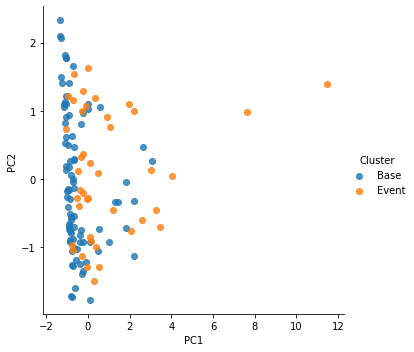

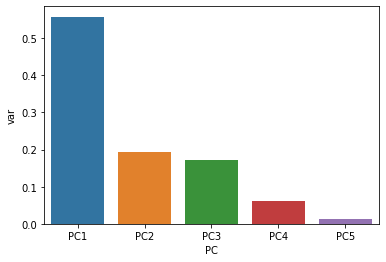

In [185]:
# standardized the dataset scale and visualized using kde plot
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

list_of_dataset = [data_corr_11, data_corr_12]
data_corr_11.name = 'Sub11'
data_corr_12.name = 'Sub12'
list_of_analytes = ['DRP', 'TP', 'TSS', 'NOx', 'TN']

for m in list_of_dataset:    
    
    for n in list_of_analytes:
        print(m.name + ' ' + n)
        feature_list = ['Site','Date', 'Sample type', 'Flow', 'precipMM', '2dayppt', '3dayppt', 'tempC', n]
        feature = m[feature_list]
        X_data = feature.iloc[:,3:8]
        Y_data = feature.iloc[:,2]
        scaled_data = StandardScaler()
        scaled_X = scaled_data.fit_transform(X_data)
        print('Before scaling')
        for i in range(0,5):
            sns.kdeplot(X_data.iloc[:,i])
        plt.show()
        print('After scaling')
        for i in range(0,5):
            sns.kdeplot(scaled_X[i])
        plt.show()
        
        #PCA analysis
        pcal = PCA(n_components =5)
        pcal.fit(scaled_X)
        trained_pcal = pcal.transform(scaled_X)
        
        pc_df = pd.DataFrame(data=trained_pcal, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
        pc_df['Cluster'] = Y_data
        p = sns.lmplot(x='PC1', y='PC2', data=pc_df, hue="Cluster", fit_reg=False, legend=True)
        plt.show()
        
        pc2_df = pd.DataFrame({'var':pcal.explained_variance_ratio_, 'PC':['PC1','PC2','PC3', 'PC4', 'PC5']})
        sns.barplot(x='PC', y='var', data=pc2_df)
        plt.show()

It appears that most all these parameters are likely to be correlated with each variable (i.e. analyte)

In [203]:
# pearson correlation test on analyte and auxiliary parameters
from scipy.stats.stats import pearsonr # for normal dataset
from scipy.stats.stats import spearmanr # for non-normal dataset

list_of_dataset = [data_corr_11, data_corr_12]
data_corr_11.name = 'Sub11'
data_corr_12.name = 'Sub12'
list_of_analytes = ['DRP', 'TP', 'TSS', 'NOx', 'TN']
list_of_aux = ['Flow', 'precipMM', '2dayppt', '3dayppt', 'tempC']
alpha = 0.05 # alpha value for all stats tests below

for m in list_of_dataset:    
    print(color.BOLD + m.name + ': pearson correlation test' + color.END)
    dataset_base = m[m['Sample type']=='Base']
    dataset_event = m[m['Sample type']=='Event']
    
    for n in list_of_analytes:
        analyte_base = dataset_base[n]
        analyte_event = dataset_event[n]
        
        # test for normality of analyte
        norm_base = stats.shapiro(analyte_base)
        norm_event = stats.shapiro(analyte_event)
        
        for o in list_of_aux:
            aux_para_base = dataset_base[o]
            aux_para_event = dataset_event[o]
            
            # test for normality of auxiliary parameters
            norm_aux_base = stats.shapiro(aux_para_base)
            norm_aux_event = stats.shapiro(aux_para_event)
                        
            if norm_base[1] <= alpha: # if analyte of baseflow sample is not normal
                if norm_aux_base[1] <= alpha: # if auxiliary parameter of baseflow sample is not normal
                    #print('baseflow analyte and aux para not normal')
                    corr, p = spearmanr(analyte_base, aux_para_base)
                    p = round(p,3)
                    corr = round(corr,3)
                    if p <= alpha: # only print if there is significant correlation
                        print(n + ' & ' + o + ' of baseflow samples are significantly correlated @ corr = ' + str(corr))          
                elif norm_aux_base[1] > alpha:
                    #print('baseflow analyte not normal, but aux para normal')
                    corr, p = spearmanr(analyte_base, aux_para_base)
                    p = round(p,3)
                    corr = round(corr,3)
                    if p <= alpha: # only print if there is significant correlation
                        print(n + ' & ' + o + ' of baseflow samples are significantly correlated @ corr = ' + str(corr)) 
            elif norm_base[1] > alpha: # if analyte of baseflow sample is normal
                if norm_aux_base[1] <= alpha: # if auxiliary parameter of baseflow sample is not normal
                    corr, p = spearmanr(analyte_base, aux_para_base)
                    p = round(p,3)
                    corr = round(corr,3)
                    if p <= alpha: # only print if there is significant correlation
                        print(n + ' & ' + o + ' of baseflow samples are significantly correlated @ corr = ' + str(corr)) 
                    #print('baseflow analyte normal, but aux para is not')
                elif norm_aux_base[1] > alpha:
                    #print('baseflow analyte and aux para normal')
                    corr, p = pearsonr(analyte_base, aux_para_base)
                    p = round(p,3)
                    corr = round(corr,3)
                    if p <= alpha: # only print if there is significant correlation
                        print(n + ' & ' + o + ' of baseflow samples are significantly correlated @ corr = ' + str(corr)) 
                
            if norm_event[1] <= alpha: # if analyte of event sample is not normal
                if norm_aux_event[1] <= alpha: # if auxiliary parameter of event sample is not normal
                    #print('event analyte and aux para not normal')
                    corr, p = spearmanr(analyte_event, aux_para_event)
                    p = round(p,3)
                    corr = round(corr,3)
                    if p <= alpha: # only print if there is significant correlation
                        print(n + ' & ' + o + ' of event samples are significantly correlated @ corr = ' + str(corr))  
                elif norm_aux_event[1] > alpha:
                    #print('event analyte not normal, but aux para normal')
                    corr, p = spearmanr(analyte_event, aux_para_event)
                    p = round(p,3)
                    corr = round(corr,3)
                    if p <= alpha: # only print if there is significant correlation
                        print(n + ' & ' + o + ' of event samples are significantly correlated @ corr = ' + str(corr))  
            elif norm_event[1] > alpha: # if analyte of event sample is normal
                if norm_aux_event[1] <= alpha: # if auxiliary parameter of event sample is not normal
                    #print('event analyte normal, but aux para is not')
                    corr, p = spearmanr(analyte_event, aux_para_event)
                    p = round(p,3)
                    corr = round(corr,3)
                    if p <= alpha: # only print if there is significant correlation
                        print(n + ' & ' + o + ' of event samples are significantly correlated @ corr = ' + str(corr))  
                elif norm_aux_event[1] > alpha:
                    #print('event analyte and aux para normal')
                    corr, p = pearsonr(analyte_event, aux_para_event)
                    p = round(p,3)
                    corr = round(corr,3)
                    if p <= alpha: # only print if there is significant correlation
                        print(n + ' & ' + o + ' of event samples are significantly correlated @ corr = ' + str(corr))       

Sub11: pearson correlation test
DRP & Flow of event samples are significantly correlated @ corr = 0.486
TP & Flow of event samples are significantly correlated @ corr = 0.409
TP & tempC of event samples are significantly correlated @ corr = 0.383
TSS & Flow of event samples are significantly correlated @ corr = 0.564
TSS & tempC of event samples are significantly correlated @ corr = 0.508
NOx & 2dayppt of event samples are significantly correlated @ corr = -0.45
Sub12: pearson correlation test
DRP & Flow of event samples are significantly correlated @ corr = 0.626
DRP & 2dayppt of baseflow samples are significantly correlated @ corr = -0.239
TP & Flow of event samples are significantly correlated @ corr = 0.616
TSS & Flow of event samples are significantly correlated @ corr = 0.559
TSS & tempC of baseflow samples are significantly correlated @ corr = 0.228
NOx & Flow of baseflow samples are significantly correlated @ corr = 0.436
NOx & precipMM of event samples are significantly correl

## These parameters are highly correlated with respective analytes

# THE END